# 6.6 Sourcing & Analyzing Time-Series Data
# Commodity: Raw milk

### This script contains the following:

#### 1. Importing your libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing the Federal Reserve Economic Data

## 1. Importing your libraries and data

In [1]:
# import libraries

import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [5]:
# create a path

path = r'C:\Users\apiny\Documents\CareerFoundry\Data Immersion\6_Advanced Analytics\EU_agriculture'

In [6]:
# import a dataframe

df = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'agri_area_pop_cleaned.csv'), index_col=False)

In [7]:
# create a dataset of RAW MILK commodity

df_rawmilk = df.loc[df['Commodity'] == 'RAW MILK']

In [8]:
df_rawmilk = df_rawmilk.groupby('Year').agg({'Production (THOUSAND TONS)': ['sum']})

In [9]:
df_rawmilk.shape

(21, 1)

In [10]:
df_rawmilk.columns = df_rawmilk.columns.droplevel(1)
df_rawmilk = df_rawmilk.rename(columns={'': 'Year'})

In [11]:
df_rawmilk = df_rawmilk.reset_index()

In [12]:
df_rawmilk.head()

,Year,Production (THOUSAND TONS)
0,2002,135200.223148
1,2003,135355.632959
2,2004,134177.800000
3,2005,134849.170822
4,2006,134312.280000


In [13]:
# change 'Year' to 'datetime' for time series

df_rawmilk['Year'] = pd.to_datetime(df_rawmilk['Year'], format='%Y', infer_datetime_format=True) 
indexedDataset = df_rawmilk.set_index(['Year'])

In [14]:
df_rawmilk.head()

,Year,Production (THOUSAND TONS)
0,2002-01-01,135200.223148
1,2003-01-01,135355.632959
2,2004-01-01,134177.800000
3,2005-01-01,134849.170822
4,2006-01-01,134312.280000


In [15]:
# Set the "Date" column as the index

from datetime import datetime

df_rawmilk['datetime'] = pd.to_datetime(df_rawmilk['Year']) # Create a datetime column from "Date.""
df_rawmilk = df_rawmilk.set_index('datetime') # Set the datetime as the index of the dataframe.
df_rawmilk.drop(['Year'], axis=1, inplace=True) # Drop the "Date" column.
df_rawmilk.head()

,Production (THOUSAND TONS)
datetime,
2002-01-01,135200.223148
2003-01-01,135355.632959
2004-01-01,134177.800000
2005-01-01,134849.170822
2006-01-01,134312.280000


In [16]:
type(df_rawmilk)

pandas.core.frame.DataFrame

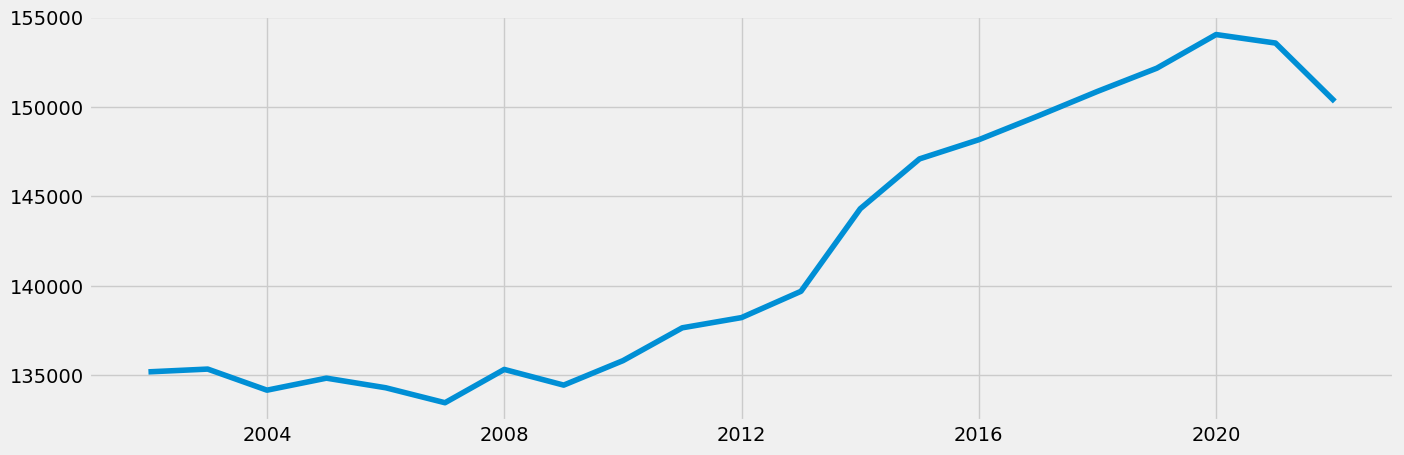

In [17]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) 
plt.plot(df_rawmilk)

### 3. Time-series analysis: decomposition

In [18]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_rawmilk, model='additive', period=1)

In [19]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

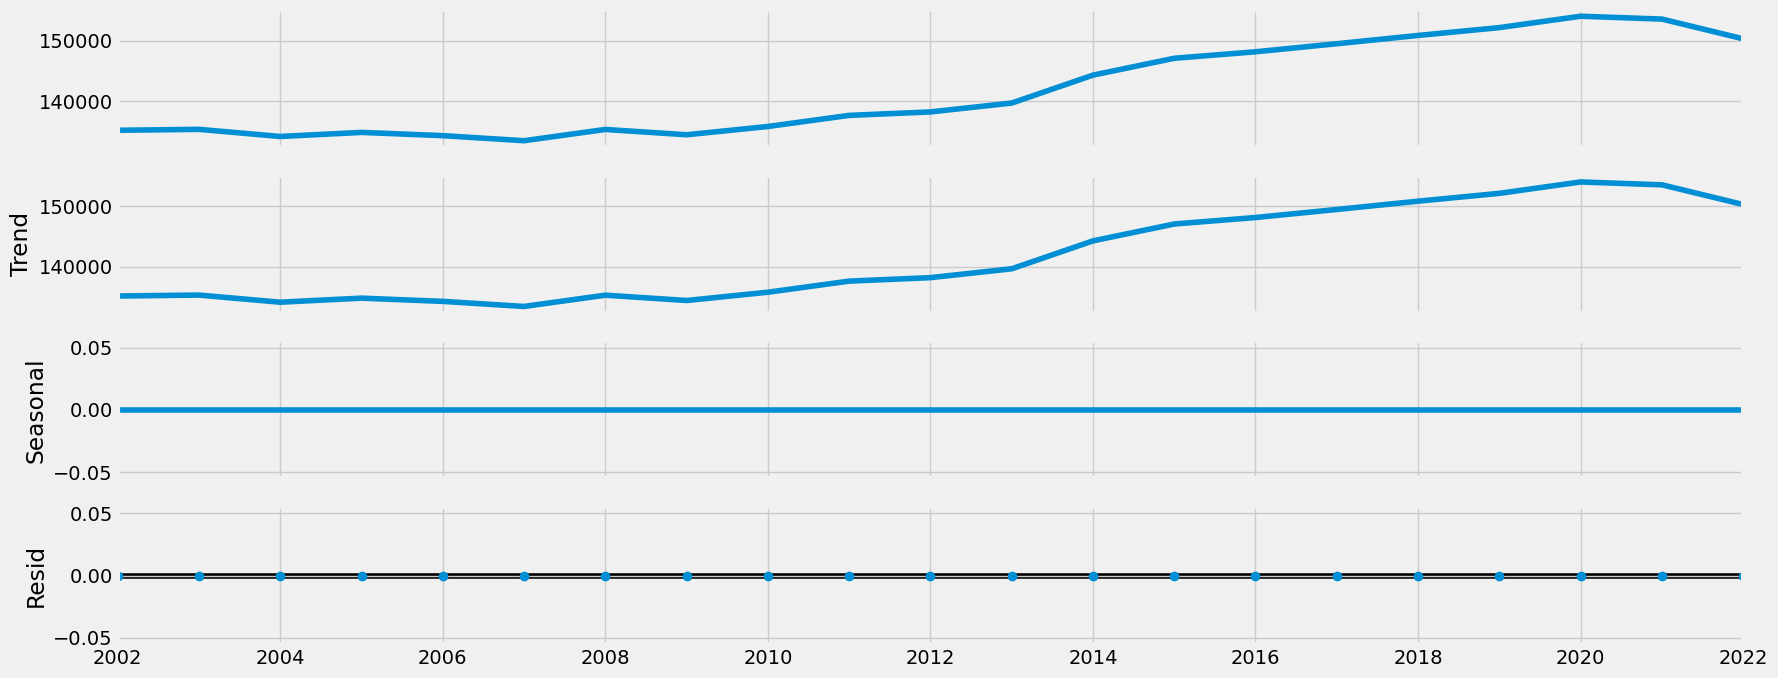

In [20]:
# Plot the separate components

decomposition.plot()
plt.show()

This data doesn't have any seasonality and residual, so I think it is improper data to conduct a time series analysis.

### change 'Year' to 'datetime' for time series

dataset['Year'] = pd.to_datetime(dataset[Year'], infer_datetime_format=True) 
indexedDataset = dataset.set_index(['Year'])